<a href="https://colab.research.google.com/github/OnyekaEkesi/Cognifyz-Technologies-Projects-Restaurant-Dataset-Analysis-and-Modelling/blob/main/Cognifyz_Tech_Project_Level_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COGNIFYZ INTERNSHIP PROJECT - LEVEL 1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression, RFE
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from scipy.stats import zscore, pearsonr, norm
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import pandas as pd
import numpy as np
import shap
import time
import joblib
import folium
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import Patch
from sklearn.metrics import make_scorer
from folium.plugins import MarkerCluster


# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Restaurant.csv')
data.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


## Level 1
**Task 1: Data Exploration and Preprocessing**

* Explore the dataset and identify the number
of rows and columns.

* Check for missing values in each column and
handle them accordingly.

* Perform data type conversion if necessary.
Analyze the distribution of the target variable
("Aggregate rating") and identify any class
imbalances.

In [4]:
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])

Number of rows: 9551
Number of columns: 21


In [5]:
print("\nData Types and Info:")
data.info()


Data Types and Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15 

In [6]:
print("\nSummary Statistics:")
data.describe()


Summary Statistics:


,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


<Axes: >

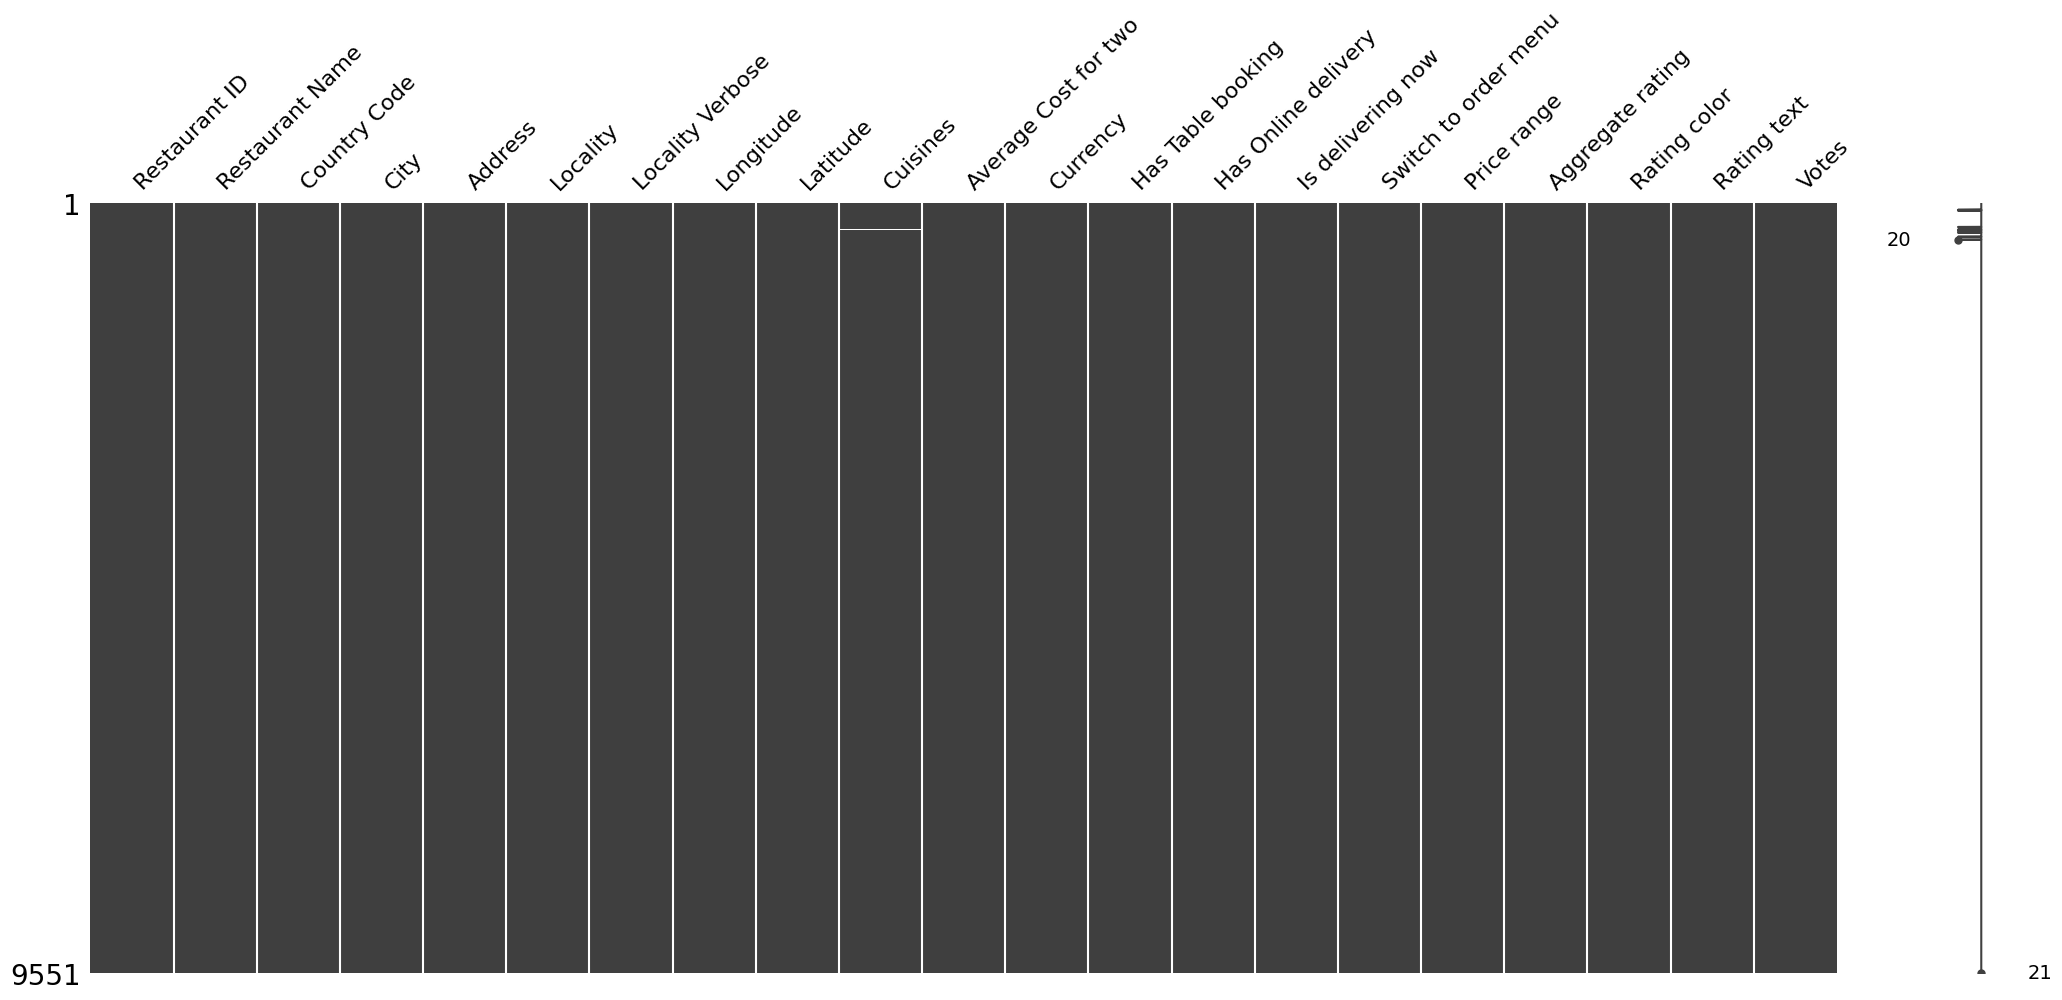

In [7]:
# Visualize missing data patterns
msno.matrix(data)

In [8]:
print("Missing values in:",  data.isna().sum())

Missing values in: Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [9]:
#Replacing the null values in 'Cuisines' with the mode
data['Cuisines'].fillna(data['Cuisines'].mode().iloc[0], inplace=True)

#Check again for null values
print(data['Cuisines'].isna().sum())

0


In [10]:
#Checkiing columns with type-object to see those fit for categorical encoding
for column in data.select_dtypes(include='object').columns:
    unique_count = data[column].nunique()
    most_common = data[column].mode().iloc[0]  # mode() returns a Series
    print(f"Column: {column}")
    print(f"  - Total Unique Values: {unique_count}")
    print(f"  - Most Occurring Value: {most_common}")
    print("-" * 40)

Column: Restaurant Name
  - Total Unique Values: 7446
  - Most Occurring Value: Cafe Coffee Day
----------------------------------------
Column: City
  - Total Unique Values: 141
  - Most Occurring Value: New Delhi
----------------------------------------
Column: Address
  - Total Unique Values: 8918
  - Most Occurring Value: Dilli Haat, INA, New Delhi
----------------------------------------
Column: Locality
  - Total Unique Values: 1208
  - Most Occurring Value: Connaught Place
----------------------------------------
Column: Locality Verbose
  - Total Unique Values: 1265
  - Most Occurring Value: Connaught Place, New Delhi
----------------------------------------
Column: Cuisines
  - Total Unique Values: 1825
  - Most Occurring Value: North Indian
----------------------------------------
Column: Currency
  - Total Unique Values: 12
  - Most Occurring Value: Indian Rupees(Rs.)
----------------------------------------
Column: Has Table booking
  - Total Unique Values: 2
  - Most Occur

In [11]:
data.select_dtypes(include='object').head()

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text
0,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent
1,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent
2,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...","Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,Green,Very Good
3,Ooma,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Sushi",Botswana Pula(P),No,No,No,No,Dark Green,Excellent
4,Sambo Kojin,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Korean",Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent


In [12]:
#replace "Yes" with 1 and "No" with 2 in the specified columns
cols_to_replace = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']

data[cols_to_replace] = data[cols_to_replace].replace({'Yes': 1, 'No': 2})

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   int64  
 13  Has Online delivery   9551 non-null   int64  
 14  Is delivering now     9551 non-null   int64  
 15  Switch to order menu 

In [14]:
print(data[['City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Rating color']].head())

               City                                            Address  \
0       Makati City  Third Floor, Century City Mall, Kalayaan Avenu...   
1       Makati City  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Mandaluyong City  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Mandaluyong City  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Mandaluyong City  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose  \
0  Century City Mall, Poblacion, Makati City, Mak...   
1  Little Tokyo, Legaspi Village, Makati City, Ma...   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...   
3  SM Megamall, Ortigas, Mandaluyong

In [15]:
print(data['Currency'].unique())

['Botswana Pula(P)' 'Brazilian Real(R$)' 'Dollar($)' 'Emirati Diram(AED)'
 'Indian Rupees(Rs.)' 'Indonesian Rupiah(IDR)' 'NewZealand($)'
 'Pounds(��)' 'Qatari Rial(QR)' 'Rand(R)' 'Sri Lankan Rupee(LKR)'
 'Turkish Lira(TL)']


In [16]:
print(data['Aggregate rating'].unique())

[4.8 4.5 4.4 4.9 4.  4.2 4.3 3.6 4.7 3.  3.8 3.7 3.2 3.1 0.  4.1 3.3 4.6
 3.9 3.4 3.5 2.2 2.9 2.4 2.6 2.8 2.1 2.7 2.5 1.8 2.  2.3 1.9]


In [17]:
rating_counts = data['Aggregate rating'].value_counts().sort_index()
rating_percentages = (rating_counts / len(data)) * 100

rating_distribution = pd.DataFrame({
    'Count': rating_counts,
    'Percentage': rating_percentages.round(2)
})

print(rating_distribution)

                  Count  Percentage
Aggregate rating                   
0.0                2148       22.49
1.8                   1        0.01
1.9                   2        0.02
2.0                   7        0.07
2.1                  15        0.16
2.2                  27        0.28
2.3                  47        0.49
2.4                  87        0.91
2.5                 110        1.15
2.6                 191        2.00
2.7                 250        2.62
2.8                 315        3.30
2.9                 381        3.99
3.0                 468        4.90
3.1                 519        5.43
3.2                 522        5.47
3.3                 483        5.06
3.4                 498        5.21
3.5                 480        5.03
3.6                 458        4.80
3.7                 427        4.47
3.8                 400        4.19
3.9                 335        3.51
4.0                 266        2.79
4.1                 274        2.87
4.2                 221     

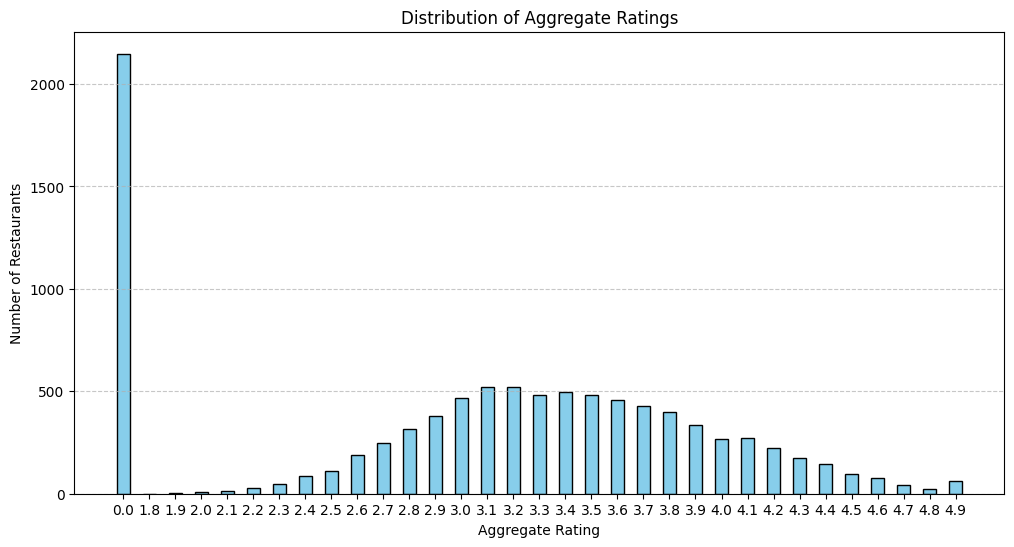

In [18]:
# Sort the values by rating
rating_counts = data['Aggregate rating'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(rating_counts.index.astype(str), rating_counts.values, width=0.5,
        color='skyblue', edgecolor='black')

plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Aggregate Ratings')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

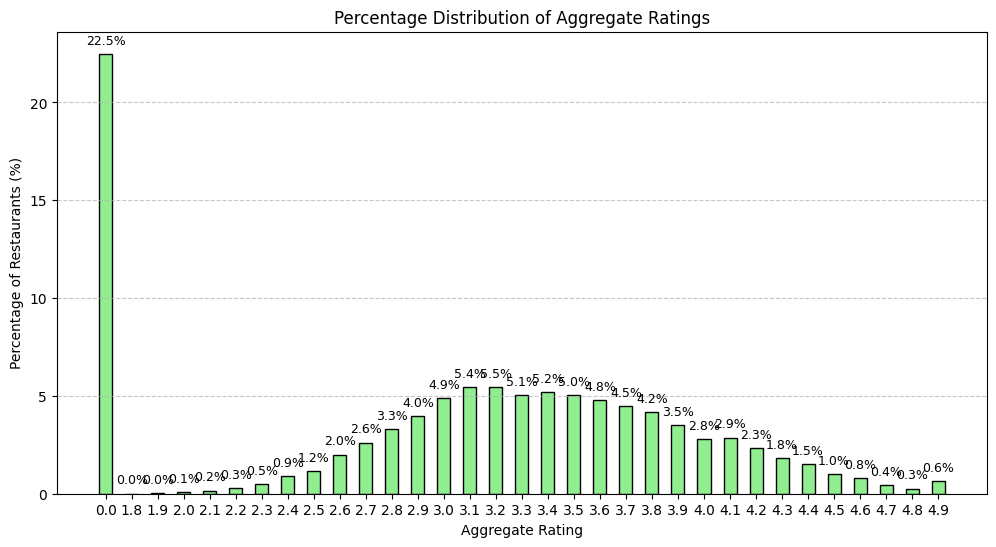

In [19]:
# Calculate percentage distribution
rating_percent = (data['Aggregate rating']
                  .value_counts(normalize=True)
                  .sort_index() * 100)

plt.figure(figsize=(12, 6))
plt.bar(rating_percent.index.astype(str), rating_percent.values, width=0.5,
        color='lightgreen', edgecolor='black')

plt.xlabel('Aggregate Rating')
plt.ylabel('Percentage of Restaurants (%)')
plt.title('Percentage Distribution of Aggregate Ratings')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show percentage on top of each bar
for i, val in enumerate(rating_percent.values):
    plt.text(i, val + 0.5, f"{val:.1f}%", ha='center', fontsize=9)

plt.show()

The Aggregate Rating distribution is highly imbalanced, with 0.0 dominating at 22.49% of the data, while most high ratings (≥4.5) and very low ratings (<2.5) occur in less than 1% of cases each. This indicates a skew toward unrated or poorly rated entries, which could bias model performance

**Task 2: Descriptive Analysis**

* Calculate basic statistical measures (mean,
median, standard deviation, etc.) for numerical
columns.
* Explore the distribution of categorical
variables like "Country Code,
" "City,
" and
"Cuisines.
"
* Identify the top cuisines and cities with the
highest number of restaurants

In [20]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.0,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.878756,1.743378,1.996440,2.0,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.326428,0.436792,0.059561,0.0,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,1.000000,1.000000,2.0,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,2.000000,1.000000,2.000000,2.0,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,2.000000,2.000000,2.0,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,2.000000,2.000000,2.0,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,2.000000,2.000000,2.000000,2.0,4.000000,4.900000,10934.000000


In [21]:
print(data['Country Code'].unique())

[162  30 216  14  37 184 214   1  94 148 215 166 189 191 208]


In [22]:
# Distribution of Country Code
country_dist = data['Country Code'].value_counts()

# Distribution of City
city_dist = data['City'].value_counts()

# Distribution of Cuisines
cuisines_dist = data['Cuisines'].value_counts()

print("Country Distribution:\n", country_dist.head())
print("\nCity Distribution:\n", city_dist.head())
print("\nCuisines Distribution:\n", cuisines_dist.head())

Country Distribution:
 Country Code
1      8652
216     434
215      80
30       60
189      60
Name: count, dtype: int64

City Distribution:
 City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: count, dtype: int64

Cuisines Distribution:
 Cuisines
North Indian             945
North Indian, Chinese    511
Fast Food                354
Chinese                  354
North Indian, Mughlai    334
Name: count, dtype: int64


*Identify top cuisines and cities with the highest number of restaurants*

In [23]:
top_cuisines = data['Cuisines'].value_counts().head(10)
top_cities = data['City'].value_counts().head(10)

print("\nTop Cuisines:\n", top_cuisines)
print("\nTop Cities:\n", top_cities)


Top Cuisines:
 Cuisines
North Indian                      945
North Indian, Chinese             511
Fast Food                         354
Chinese                           354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

Top Cities:
 City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64


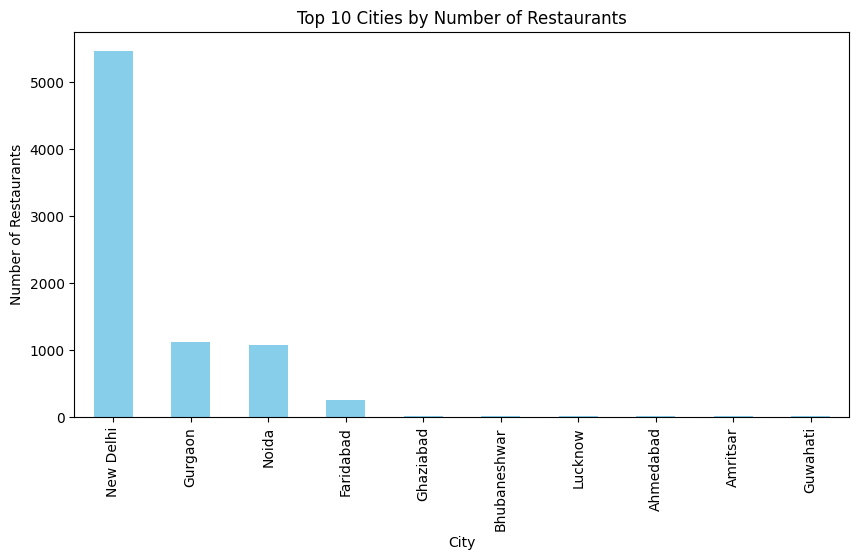

In [24]:
# Top 10 cities
top_cities.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('Top 10 Cities by Number of Restaurants')
plt.ylabel('Number of Restaurants')
plt.show()

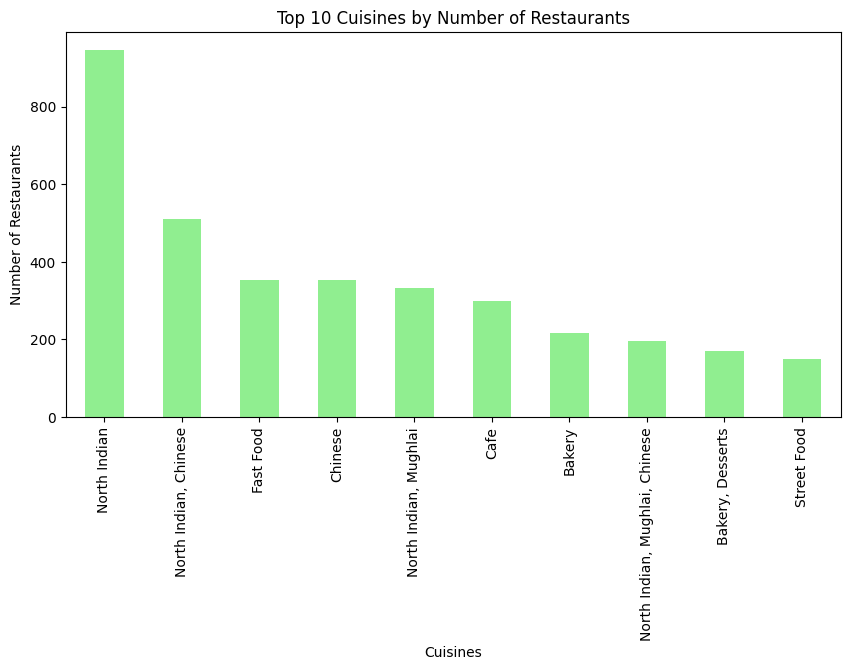

In [25]:
# Top 10 cuisines
top_cuisines.plot(kind='bar', figsize=(10,5), color='lightgreen')
plt.title('Top 10 Cuisines by Number of Restaurants')
plt.ylabel('Number of Restaurants')
plt.show()

**Task 3: Geospatial Analysis**

* Visualize the locations of restaurants on a
map using latitude and longitude
information.

* Analyze the distribution of restaurants
across different cities or countries.
Determine if there is any correlation
between the restaurant's location and its
rating.

***A Map illustrationg the distribution of restaurants across different cities or countries***

In [25]:
# Create a smaller base map
m = folium.Map(
    location=[data['Latitude'].mean(), data['Longitude'].mean()],
    zoom_start=2,
    width='70%',    # Reduce map width
    height='70%'    # Reduce map height
)

# Add restaurant locations
for _, row in data.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=2,
        popup=row['Restaurant Name'],
        color='red',
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

# Display map inline
m

***A Map Showing the correlation between the restaurant's location and its rating.***

In [25]:
# Filter to a specific region for faster loading (optional)
# Example: Only India
# data = data[data['Country Code'] == 1]  # Replace with your country code

# Base map with smaller zoom area
m = folium.Map(
    location=[data['Latitude'].mean(), data['Longitude'].mean()],
    zoom_start=4,  # Closer view than zoom_start=2
    width='70%',   # Reduce map width
    height='70%'   # Reduce map height
)

# Marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Color based on rating
def get_color(rating):
    if rating >= 4.0:
        return 'green'
    elif rating >= 3.0:
        return 'orange'
    elif rating > 0:
        return 'red'
    else:
        return 'gray'

# Add points
for _, row in data.iterrows():
    popup_info = f"""
    <b>{row['Restaurant Name']}</b><br>
    City: {row['City']}<br>
    Country Code: {row['Country Code']}<br>
    Rating: {row['Aggregate rating']}
    """
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3,
        popup=popup_info,
        color=get_color(row['Aggregate rating']),
        fill=True,
        fill_color=get_color(row['Aggregate rating']),
        fill_opacity=0.7
    ).add_to(marker_cluster)

m